# 02 卷积操作的数学原理

> 从公式到直觉，彻底理解卷积运算

---

## 📚 学习目标

在本章结束后，你将能够：

- [ ] 理解 1D 和 2D 卷积的数学定义
- [ ] 掌握所有相关符号的含义和读音
- [ ] 区分卷积和互相关
- [ ] 计算卷积的输出尺寸
- [ ] 理解 Padding 和 Stride 的作用

## 🔍 前置知识

请确保已完成：

- ✅ **01_why_convolution.ipynb** - 理解卷积的直觉
- ✅ **线性代数基础** - 矩阵运算

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(42)
print("环境准备完成！")

环境准备完成！


---

## 📖 符号读音表

在学习卷积之前，先熟悉这些符号：

| 符号 | 英文读音 | 中文读法 | 含义 |
|------|----------|----------|------|
| $*$ | asterisk | "卷积" | 卷积运算符 |
| $\star$ | star | "互相关" | 互相关运算符 |
| $I$ | I (Input) | "输入" | 输入图像/信号 |
| $K$ | K (Kernel) | "核" | 卷积核 |
| $W$ | W (Weight) | "权重" | 同卷积核 |
| $F$ | F (Filter) | "滤波器" | 同卷积核 |
| $O$ | O (Output) | "输出" | 卷积结果 |
| $H$ | H (Height) | "高度" | 图像高度 |
| $W$ | W (Width) | "宽度" | 图像宽度 |
| $C$ | C (Channel) | "通道" | 通道数 |
| $k_h$ | k-h | "核高" | 卷积核高度 |
| $k_w$ | k-w | "核宽" | 卷积核宽度 |
| $p$ | p (Padding) | "帕丁" | 填充 |
| $s$ | s (Stride) | "斯揣德" | 步幅 |
| $\sum$ | sigma | "求和" | 求和符号 |
| $\lfloor x \rfloor$ | floor | "下取整" | 向下取整 |

---

## 💡 第一部分：1D 卷积

先从简单的一维卷积开始理解。

### 1.1 1D 卷积的定义

**公式 1.1 - 离散 1D 卷积**：

$$
(I * K)[n] = \sum_{m=0}^{k-1} I[n + m] \cdot K[m]
$$

**符号说明：**
- $I$：输入信号（长度为 $L$）
- $K$：卷积核（长度为 $k$）
- $n$：输出位置的索引
- $m$：核内的索引
- $(I * K)[n]$：输出在位置 $n$ 的值

In [2]:
# ============================================================
# 1D 卷积的图解
# ============================================================

# 输入信号
input_signal = np.array([1, 2, 3, 4, 5, 6])

# 卷积核
kernel = np.array([1, 0, -1])

print("输入信号 I:", input_signal)
print("卷积核 K:", kernel)
print("\n手动计算 1D 卷积过程：")
print("=" * 50)

# 手动计算
output_len = len(input_signal) - len(kernel) + 1
output = []

for n in range(output_len):
    # 提取当前窗口
    window = input_signal[n:n+len(kernel)]
    # 计算点积
    result = np.sum(window * kernel)
    output.append(result)
    
    print(f"位置 n={n}: I[{n}:{n+3}] = {window}")
    print(f"         {window} · {kernel} = {window[0]}×{kernel[0]} + {window[1]}×{kernel[1]} + {window[2]}×{kernel[2]} = {result}")
    print()

print(f"输出 O: {output}")

输入信号 I: [1 2 3 4 5 6]
卷积核 K: [ 1  0 -1]

手动计算 1D 卷积过程：
位置 n=0: I[0:3] = [1 2 3]
         [1 2 3] · [ 1  0 -1] = 1×1 + 2×0 + 3×-1 = -2

位置 n=1: I[1:4] = [2 3 4]
         [2 3 4] · [ 1  0 -1] = 2×1 + 3×0 + 4×-1 = -2

位置 n=2: I[2:5] = [3 4 5]
         [3 4 5] · [ 1  0 -1] = 3×1 + 4×0 + 5×-1 = -2

位置 n=3: I[3:6] = [4 5 6]
         [4 5 6] · [ 1  0 -1] = 4×1 + 5×0 + 6×-1 = -2

输出 O: [-2, -2, -2, -2]


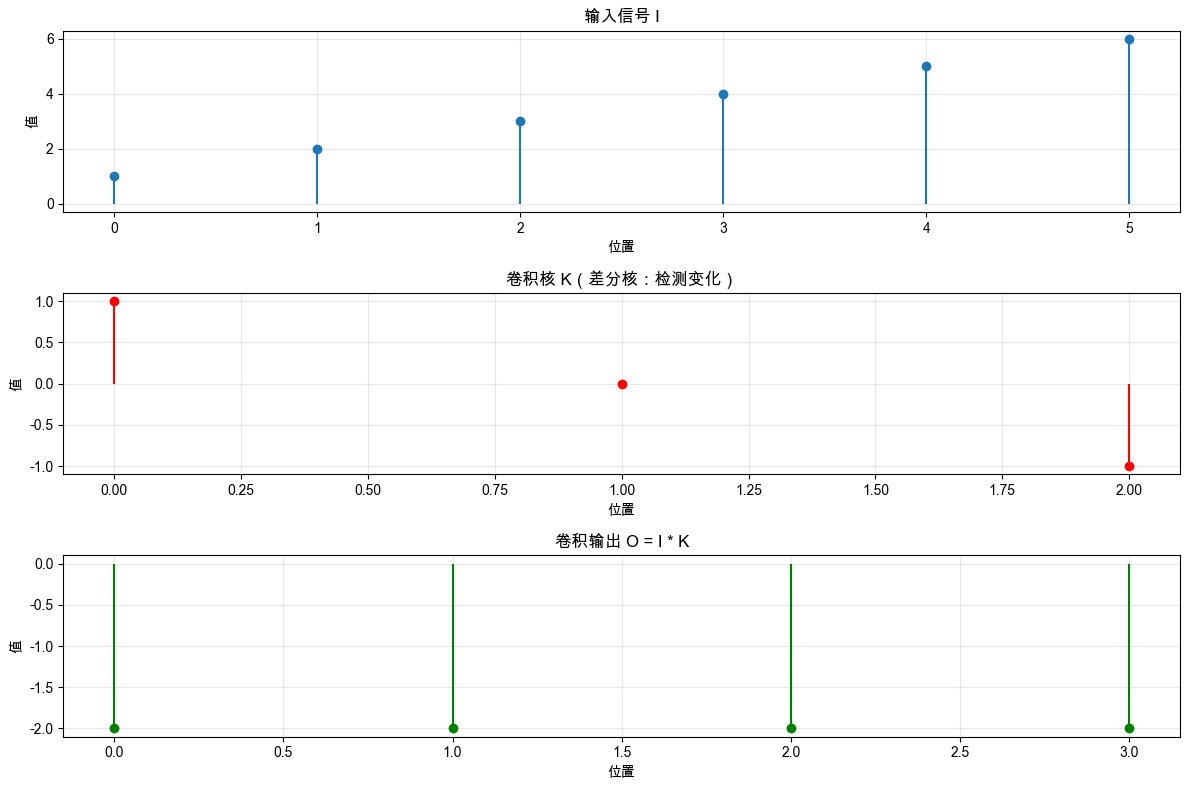

💡 这个核 [1, 0, -1] 计算的是差分，检测信号的变化
   输出全是 2，说明输入是等差数列（每步增加 2）


In [3]:
# ============================================================
# 1D 卷积可视化
# ============================================================

fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# 输入信号
axes[0].stem(range(len(input_signal)), input_signal, basefmt=' ')
axes[0].set_title('输入信号 I', fontsize=12)
axes[0].set_xlabel('位置')
axes[0].set_ylabel('值')
axes[0].grid(True, alpha=0.3)

# 卷积核
axes[1].stem(range(len(kernel)), kernel, basefmt=' ', linefmt='r-', markerfmt='ro')
axes[1].set_title('卷积核 K（差分核：检测变化）', fontsize=12)
axes[1].set_xlabel('位置')
axes[1].set_ylabel('值')
axes[1].grid(True, alpha=0.3)

# 输出
axes[2].stem(range(len(output)), output, basefmt=' ', linefmt='g-', markerfmt='go')
axes[2].set_title('卷积输出 O = I * K', fontsize=12)
axes[2].set_xlabel('位置')
axes[2].set_ylabel('值')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 这个核 [1, 0, -1] 计算的是差分，检测信号的变化")
print("   输出全是 2，说明输入是等差数列（每步增加 2）")

---

## 💡 第二部分：2D 卷积

### 2.1 2D 卷积的定义

**公式 2.1 - 2D 卷积**：

$$
(I * K)[i, j] = \sum_{m=0}^{k_h-1} \sum_{n=0}^{k_w-1} I[i+m, j+n] \cdot K[m, n]
$$

**符号说明：**
- $I$：输入图像，形状 $(H, W)$
- $K$：卷积核，形状 $(k_h, k_w)$
- $(i, j)$：输出位置
- $(m, n)$：核内位置
- $k_h, k_w$：核的高度和宽度

**直觉理解：**
- 滑动窗口在图像上移动
- 每个位置：窗口内像素与核逐元素相乘，然后求和
- 得到一个标量输出

In [4]:
# ============================================================
# 2D 卷积的图解
# ============================================================

# 4×4 输入图像
image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
], dtype=float)

# 2×2 卷积核
kernel = np.array([
    [1, 0],
    [0, -1]
], dtype=float)

print("输入图像 I (4×4):")
print(image)
print("\n卷积核 K (2×2):")
print(kernel)
print("\n" + "=" * 60)
print("手动计算 2D 卷积过程：")
print("=" * 60)

# 手动计算
H, W = image.shape
k_h, k_w = kernel.shape
out_h = H - k_h + 1
out_w = W - k_w + 1

output = np.zeros((out_h, out_w))

for i in range(out_h):
    for j in range(out_w):
        # 提取感受野
        patch = image[i:i+k_h, j:j+k_w]
        # 逐元素相乘并求和
        result = np.sum(patch * kernel)
        output[i, j] = result
        
        print(f"\n位置 (i={i}, j={j}):")
        print(f"  感受野 I[{i}:{i+k_h}, {j}:{j+k_w}]:")
        print(f"    {patch[0]}")
        print(f"    {patch[1]}")
        print(f"  计算: {patch[0,0]}×{kernel[0,0]} + {patch[0,1]}×{kernel[0,1]} + {patch[1,0]}×{kernel[1,0]} + {patch[1,1]}×{kernel[1,1]}")
        print(f"       = {patch[0,0]*kernel[0,0]} + {patch[0,1]*kernel[0,1]} + {patch[1,0]*kernel[1,0]} + {patch[1,1]*kernel[1,1]} = {result}")

print("\n" + "=" * 60)
print("输出 O (3×3):")
print(output)

输入图像 I (4×4):
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]

卷积核 K (2×2):
[[ 1.  0.]
 [ 0. -1.]]

手动计算 2D 卷积过程：

位置 (i=0, j=0):
  感受野 I[0:2, 0:2]:
    [1. 2.]
    [5. 6.]
  计算: 1.0×1.0 + 2.0×0.0 + 5.0×0.0 + 6.0×-1.0
       = 1.0 + 0.0 + 0.0 + -6.0 = -5.0

位置 (i=0, j=1):
  感受野 I[0:2, 1:3]:
    [2. 3.]
    [6. 7.]
  计算: 2.0×1.0 + 3.0×0.0 + 6.0×0.0 + 7.0×-1.0
       = 2.0 + 0.0 + 0.0 + -7.0 = -5.0

位置 (i=0, j=2):
  感受野 I[0:2, 2:4]:
    [3. 4.]
    [7. 8.]
  计算: 3.0×1.0 + 4.0×0.0 + 7.0×0.0 + 8.0×-1.0
       = 3.0 + 0.0 + 0.0 + -8.0 = -5.0

位置 (i=1, j=0):
  感受野 I[1:3, 0:2]:
    [5. 6.]
    [ 9. 10.]
  计算: 5.0×1.0 + 6.0×0.0 + 9.0×0.0 + 10.0×-1.0
       = 5.0 + 0.0 + 0.0 + -10.0 = -5.0

位置 (i=1, j=1):
  感受野 I[1:3, 1:3]:
    [6. 7.]
    [10. 11.]
  计算: 6.0×1.0 + 7.0×0.0 + 10.0×0.0 + 11.0×-1.0
       = 6.0 + 0.0 + 0.0 + -11.0 = -5.0

位置 (i=1, j=2):
  感受野 I[1:3, 2:4]:
    [7. 8.]
    [11. 12.]
  计算: 7.0×1.0 + 8.0×0.0 + 11.0×0.0 + 12.0×-1.0
       = 7.0 + 0.0 + 0.0 

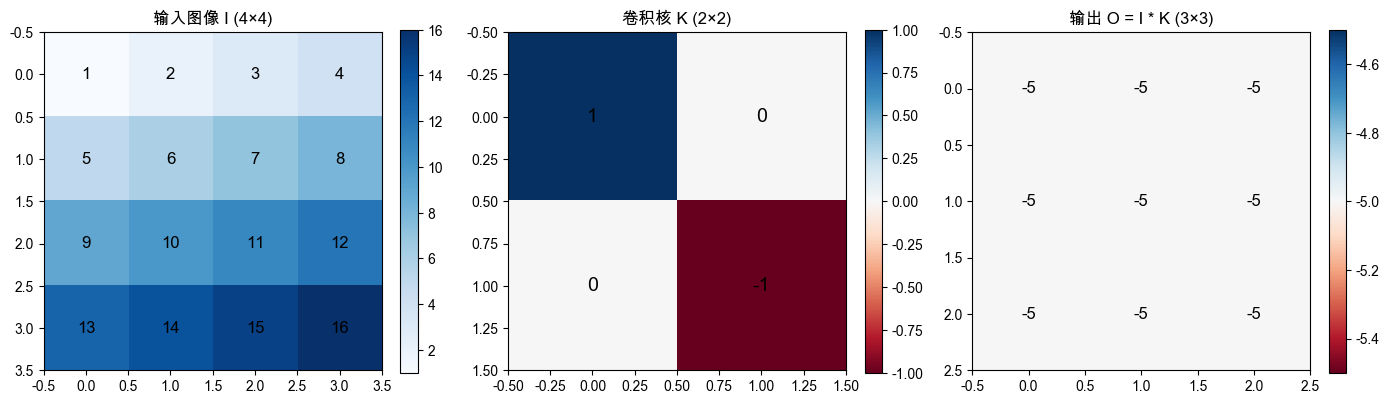

💡 这个核计算的是对角线差值，输出恒为 -4（每个对角差相同）


In [5]:
# ============================================================
# 2D 卷积可视化
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# 输入
im0 = axes[0].imshow(image, cmap='Blues')
axes[0].set_title('输入图像 I (4×4)', fontsize=12)
for i in range(4):
    for j in range(4):
        axes[0].text(j, i, f'{image[i,j]:.0f}', ha='center', va='center', fontsize=12)
plt.colorbar(im0, ax=axes[0], fraction=0.046)

# 卷积核
im1 = axes[1].imshow(kernel, cmap='RdBu', vmin=-1, vmax=1)
axes[1].set_title('卷积核 K (2×2)', fontsize=12)
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, f'{kernel[i,j]:.0f}', ha='center', va='center', fontsize=14)
plt.colorbar(im1, ax=axes[1], fraction=0.046)

# 输出
im2 = axes[2].imshow(output, cmap='RdBu')
axes[2].set_title('输出 O = I * K (3×3)', fontsize=12)
for i in range(3):
    for j in range(3):
        axes[2].text(j, i, f'{output[i,j]:.0f}', ha='center', va='center', fontsize=12)
plt.colorbar(im2, ax=axes[2], fraction=0.046)

plt.tight_layout()
plt.show()

print("💡 这个核计算的是对角线差值，输出恒为 -4（每个对角差相同）")

---

## 📐 第三部分：卷积 vs 互相关

### 3.1 数学上的区别

**真正的卷积**（数学定义）会先翻转核：

$$
(I * K)[i, j] = \sum_{m} \sum_{n} I[i-m, j-n] \cdot K[m, n]
$$

**互相关**（Cross-correlation）不翻转核：

$$
(I \star K)[i, j] = \sum_{m} \sum_{n} I[i+m, j+n] \cdot K[m, n]
$$

### 3.2 深度学习中的"卷积"

**重要事实**：深度学习框架（PyTorch、TensorFlow）中的"卷积"实际上是**互相关**！

为什么可以这样？
- 核是学习得到的
- 如果需要翻转的核，网络会自己学出翻转后的版本
- 效果完全一样

In [6]:
# ============================================================
# 卷积 vs 互相关 对比
# ============================================================

# 非对称核（更容易看出区别）
kernel_asymm = np.array([
    [1, 2],
    [3, 4]
], dtype=float)

# 翻转核（180度旋转）
kernel_flipped = np.flip(np.flip(kernel_asymm, axis=0), axis=1)

print("原始核:")
print(kernel_asymm)
print("\n翻转后的核 (180° 旋转):")
print(kernel_flipped)

# 简单输入
simple_input = np.array([
    [1, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
], dtype=float)

# 互相关（深度学习使用的）
cross_corr = signal.correlate2d(simple_input, kernel_asymm, mode='valid')

# 真正的卷积
true_conv = signal.convolve2d(simple_input, kernel_asymm, mode='valid')

print("\n输入:")
print(simple_input)
print("\n互相关结果 (深度学习的 'conv'):")
print(cross_corr)
print("\n真正的数学卷积结果:")
print(true_conv)

print("\n💡 注意：两个结果不同！")
print("   但在深度学习中，核是学出来的，所以用哪个都可以。")

原始核:
[[1. 2.]
 [3. 4.]]

翻转后的核 (180° 旋转):
[[4. 3.]
 [2. 1.]]

输入:
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

互相关结果 (深度学习的 'conv'):
[[1. 0.]
 [0. 0.]]

真正的数学卷积结果:
[[4. 0.]
 [0. 0.]]

💡 注意：两个结果不同！
   但在深度学习中，核是学出来的，所以用哪个都可以。


---

## 📐 第四部分：输出尺寸公式

### 4.1 基本情况（无 padding，stride=1）

**公式 4.1**：

$$
H_{out} = H_{in} - k_h + 1
$$

$$
W_{out} = W_{in} - k_w + 1
$$

**推导**：
- 核从位置 0 开始滑动
- 最远可以滑到位置 $H_{in} - k_h$
- 共有 $H_{in} - k_h + 1$ 个有效位置

In [7]:
# ============================================================
# 输出尺寸计算示例
# ============================================================

def output_size_basic(H_in, W_in, k_h, k_w):
    """
    计算基本卷积的输出尺寸
    
    公式: H_out = H_in - k_h + 1
    """
    H_out = H_in - k_h + 1
    W_out = W_in - k_w + 1
    return H_out, W_out


# 例子
examples = [
    (28, 28, 3, 3),   # MNIST + 3×3 核
    (28, 28, 5, 5),   # MNIST + 5×5 核
    (224, 224, 7, 7), # ImageNet + 7×7 核
    (32, 32, 3, 3),   # CIFAR + 3×3 核
]

print("输出尺寸计算 (无 padding, stride=1)")
print("=" * 50)
print(f"{'输入尺寸':<15} {'核尺寸':<10} {'输出尺寸':<15}")
print("-" * 50)

for H_in, W_in, k_h, k_w in examples:
    H_out, W_out = output_size_basic(H_in, W_in, k_h, k_w)
    print(f"{H_in}×{W_in:<10} {k_h}×{k_w:<6} {H_out}×{W_out}")

print("\n💡 注意：每次卷积都会让尺寸减小！")

输出尺寸计算 (无 padding, stride=1)
输入尺寸            核尺寸        输出尺寸           
--------------------------------------------------
28×28         3×3      26×26
28×28         5×5      24×24
224×224        7×7      218×218
32×32         3×3      30×30

💡 注意：每次卷积都会让尺寸减小！


### 4.2 Padding（填充）

**问题**：每次卷积都让尺寸减小，深层网络怎么办？

**解决**：在输入边缘填充零（或其他值）

**公式 4.2（带 padding）**：

$$
H_{out} = H_{in} + 2p - k_h + 1
$$

其中 $p$ 是填充的像素数。

**常见设置：**
- **Valid padding**：$p = 0$，尺寸会减小
- **Same padding**：$p = \lfloor k/2 \rfloor$，尺寸保持不变（对于奇数核）

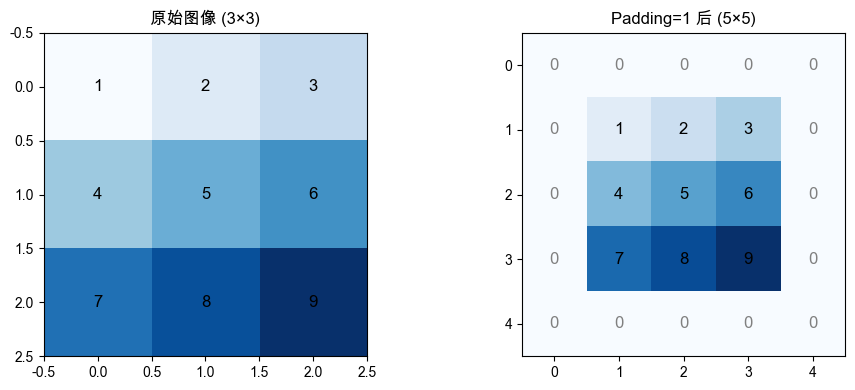

💡 灰色的 0 是填充的像素


In [8]:
# ============================================================
# Padding 可视化
# ============================================================

# 原始图像
original = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=float)

# 添加 padding=1
padded = np.pad(original, pad_width=1, mode='constant', constant_values=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 原始
im0 = axes[0].imshow(original, cmap='Blues')
axes[0].set_title(f'原始图像 (3×3)', fontsize=12)
for i in range(3):
    for j in range(3):
        axes[0].text(j, i, f'{original[i,j]:.0f}', ha='center', va='center', fontsize=12)

# 填充后
im1 = axes[1].imshow(padded, cmap='Blues')
axes[1].set_title(f'Padding=1 后 (5×5)', fontsize=12)
for i in range(5):
    for j in range(5):
        val = padded[i, j]
        color = 'gray' if val == 0 else 'black'
        axes[1].text(j, i, f'{val:.0f}', ha='center', va='center', fontsize=12, color=color)

plt.tight_layout()
plt.show()

print("💡 灰色的 0 是填充的像素")

In [9]:
# ============================================================
# Same Padding 示例
# ============================================================

def output_size_with_padding(H_in, W_in, k_h, k_w, p):
    """
    计算带 padding 的卷积输出尺寸
    
    公式: H_out = H_in + 2p - k_h + 1
    """
    H_out = H_in + 2 * p - k_h + 1
    W_out = W_in + 2 * p - k_w + 1
    return H_out, W_out


# 3×3 核的 same padding
H_in, W_in = 28, 28
k = 3
p_same = k // 2  # 对于 3×3，p=1

print(f"输入: {H_in}×{W_in}")
print(f"核大小: {k}×{k}")
print(f"Same padding: p = {p_same}")

H_out, W_out = output_size_with_padding(H_in, W_in, k, k, p_same)
print(f"输出: {H_out}×{W_out}")
print(f"\n✅ 输入输出尺寸相同！这就是 'same' padding 的含义")

输入: 28×28
核大小: 3×3
Same padding: p = 1
输出: 28×28

✅ 输入输出尺寸相同！这就是 'same' padding 的含义


### 4.3 Stride（步幅）

**含义**：每次滑动的距离

- stride=1：每次移动 1 个像素
- stride=2：每次移动 2 个像素（下采样）

**公式 4.3（完整版）**：

$$
H_{out} = \left\lfloor \frac{H_{in} + 2p - k_h}{s} \right\rfloor + 1
$$

**符号说明：**
- $p$：padding（填充）
- $s$：stride（步幅）
- $\lfloor \cdot \rfloor$：向下取整（floor，读作"弗洛尔"）

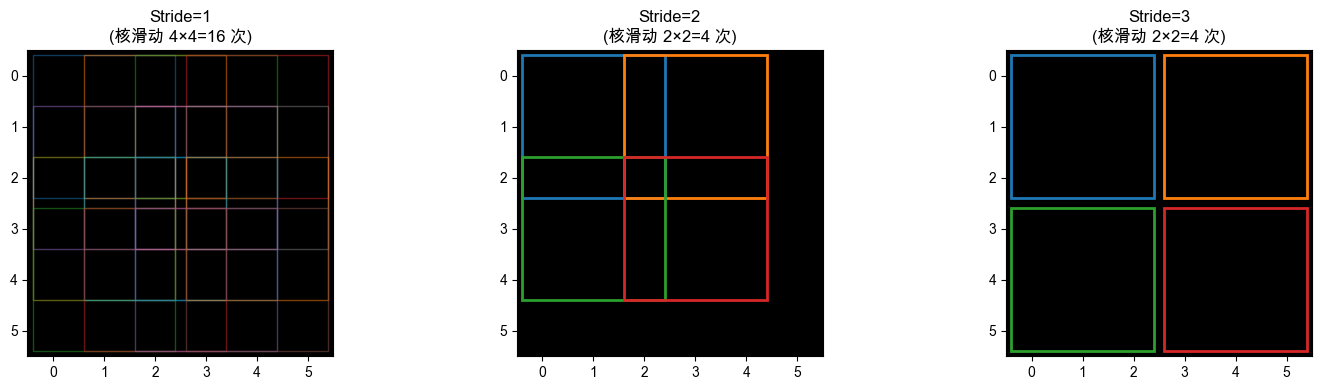

💡 Stride 越大，输出尺寸越小（下采样效果）


In [10]:
# ============================================================
# Stride 可视化
# ============================================================

def visualize_stride():
    """可视化不同 stride 的效果"""
    # 6×6 输入
    image = np.arange(36).reshape(6, 6)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Stride = 1
    axes[0].imshow(np.ones((6, 6)), cmap='Greys', vmin=0, vmax=1)
    axes[0].set_title('Stride=1\n(核滑动 4×4=16 次)', fontsize=12)
    for i in range(4):
        for j in range(4):
            rect = plt.Rectangle((j-0.4, i-0.4), 2.8, 2.8, 
                                fill=False, edgecolor=f'C{i*4+j}', linewidth=1, alpha=0.5)
            axes[0].add_patch(rect)
    axes[0].set_xlim(-0.5, 5.5)
    axes[0].set_ylim(5.5, -0.5)
    
    # Stride = 2
    axes[1].imshow(np.ones((6, 6)), cmap='Greys', vmin=0, vmax=1)
    axes[1].set_title('Stride=2\n(核滑动 2×2=4 次)', fontsize=12)
    colors = ['C0', 'C1', 'C2', 'C3']
    positions = [(0, 0), (0, 2), (2, 0), (2, 2)]
    for (i, j), c in zip(positions, colors):
        rect = plt.Rectangle((j-0.4, i-0.4), 2.8, 2.8, 
                            fill=False, edgecolor=c, linewidth=2)
        axes[1].add_patch(rect)
    axes[1].set_xlim(-0.5, 5.5)
    axes[1].set_ylim(5.5, -0.5)
    
    # Stride = 3
    axes[2].imshow(np.ones((6, 6)), cmap='Greys', vmin=0, vmax=1)
    axes[2].set_title('Stride=3\n(核滑动 2×2=4 次)', fontsize=12)
    positions = [(0, 0), (0, 3), (3, 0), (3, 3)]
    for (i, j), c in zip(positions, colors):
        rect = plt.Rectangle((j-0.4, i-0.4), 2.8, 2.8, 
                            fill=False, edgecolor=c, linewidth=2)
        axes[2].add_patch(rect)
    axes[2].set_xlim(-0.5, 5.5)
    axes[2].set_ylim(5.5, -0.5)
    
    plt.tight_layout()
    plt.show()

visualize_stride()
print("💡 Stride 越大，输出尺寸越小（下采样效果）")

In [11]:
# ============================================================
# 完整的输出尺寸公式
# ============================================================

def output_size_full(H_in, W_in, k_h, k_w, p=0, s=1):
    """
    计算完整的卷积输出尺寸
    
    公式: H_out = floor((H_in + 2p - k_h) / s) + 1
    
    参数:
        H_in, W_in: 输入尺寸
        k_h, k_w: 核尺寸
        p: padding（填充）
        s: stride（步幅）
    """
    H_out = (H_in + 2 * p - k_h) // s + 1
    W_out = (W_in + 2 * p - k_w) // s + 1
    return H_out, W_out


# 测试各种情况
print("输出尺寸计算 (完整公式)")
print("=" * 70)
print(f"{'输入':<10} {'核':<8} {'padding':<10} {'stride':<8} {'输出':<10}")
print("-" * 70)

test_cases = [
    (224, 224, 7, 7, 0, 1),   # 基本情况
    (224, 224, 7, 7, 3, 1),   # 有 padding
    (224, 224, 7, 7, 3, 2),   # 有 stride
    (28, 28, 3, 3, 1, 1),     # MNIST same conv
    (28, 28, 3, 3, 1, 2),     # MNIST with stride
]

for H_in, W_in, k_h, k_w, p, s in test_cases:
    H_out, W_out = output_size_full(H_in, W_in, k_h, k_w, p, s)
    print(f"{H_in}×{W_in:<6} {k_h}×{k_w:<4} p={p:<8} s={s:<6} {H_out}×{W_out}")

输出尺寸计算 (完整公式)
输入         核        padding    stride   输出        
----------------------------------------------------------------------
224×224    7×7    p=0        s=1      218×218
224×224    7×7    p=3        s=1      224×224
224×224    7×7    p=3        s=2      112×112
28×28     3×3    p=1        s=1      28×28
28×28     3×3    p=1        s=2      14×14


---

## 📐 第五部分：多通道卷积

### 5.1 彩色图像的卷积

RGB 图像有 3 个通道，卷积核也要有 3 个通道：

**公式 5.1 - 多通道卷积**：

$$
O[i, j] = \sum_{c=0}^{C_{in}-1} \sum_{m=0}^{k_h-1} \sum_{n=0}^{k_w-1} I[c, i+m, j+n] \cdot K[c, m, n] + b
$$

**解释：**
- 输入 $I$：形状 $(C_{in}, H, W)$
- 核 $K$：形状 $(C_{in}, k_h, k_w)$
- 输出 $O$：形状 $(H_{out}, W_{out})$（一个通道！）
- 所有通道的结果求和，加偏置

In [ ]:
# ============================================================
# 多通道卷积示意图
# ============================================================

print("多通道卷积示意：")
print()
print("输入 (3通道):         核 (3通道):          输出 (1通道):")
print("┌─────────────┐      ┌─────────┐")
print("│  R通道       │      │ K_R     │")
print("│  (H × W)    │   ∗  │ (3 × 3) │")
print("├─────────────┤      ├─────────┤")
print("│  G通道       │      │ K_G     │      ┌─────────┐")
print("│  (H × W)    │   ∗  │ (3 × 3) │  →   │ 求和+b   │")
print("├─────────────┤      ├─────────┤      │(H'× W') │")
print("│  B通道       │      │ K_B     │      └─────────┘")
print("│  (H × W)    │   ∗  │ (3 × 3) │")
print("└─────────────┘      └─────────┘")
print()
print("💡 一个核产生一个输出通道")
print("   多个核产生多个输出通道")

### 5.2 多输入多输出通道

实际的卷积层有多个核，产生多个输出通道：

**输入**：$(C_{in}, H, W)$
**核**：$(C_{out}, C_{in}, k_h, k_w)$ ← 有 $C_{out}$ 个核
**输出**：$(C_{out}, H_{out}, W_{out})$

In [12]:
# ============================================================
# 卷积层参数量计算
# ============================================================

def conv_params(C_in, C_out, k_h, k_w):
    """
    计算卷积层的参数量
    
    权重: C_out × C_in × k_h × k_w
    偏置: C_out
    """
    weights = C_out * C_in * k_h * k_w
    biases = C_out
    return weights + biases


print("卷积层参数量示例")
print("=" * 60)
print(f"{'描述':<25} {'参数量':<15}")
print("-" * 60)

examples = [
    ("RGB → 64通道, 3×3核", 3, 64, 3, 3),
    ("64 → 128通道, 3×3核", 64, 128, 3, 3),
    ("128 → 256通道, 3×3核", 128, 256, 3, 3),
    ("RGB → 64通道, 7×7核", 3, 64, 7, 7),
]

for desc, C_in, C_out, k_h, k_w in examples:
    params = conv_params(C_in, C_out, k_h, k_w)
    print(f"{desc:<25} {params:,}")

卷积层参数量示例
描述                        参数量            
------------------------------------------------------------
RGB → 64通道, 3×3核          1,792
64 → 128通道, 3×3核          73,856
128 → 256通道, 3×3核         295,168
RGB → 64通道, 7×7核          9,472


---

## 📝 本章小结

### 核心公式

| 公式 | 内容 |
|------|------|
| 2D 卷积 | $(I * K)[i,j] = \sum_m \sum_n I[i+m, j+n] \cdot K[m,n]$ |
| 输出尺寸 | $H_{out} = \lfloor \frac{H_{in} + 2p - k_h}{s} \rfloor + 1$ |
| Same padding | $p = \lfloor k/2 \rfloor$（对于奇数核）|
| 参数量 | $C_{out} \times C_{in} \times k_h \times k_w + C_{out}$ |

### 关键概念

1. **卷积操作**：滑动窗口，逐元素相乘求和
2. **互相关 vs 卷积**：深度学习用互相关，但叫"卷积"
3. **Padding**：填充零，保持尺寸
4. **Stride**：控制滑动步长，实现下采样
5. **多通道**：一个核处理所有输入通道，产生一个输出通道

---

## 🎯 练习

### 练习 1：计算输出尺寸

输入 64×64×3，经过以下卷积层后的尺寸是多少？

1. Conv(32, kernel=3, padding=1, stride=1)
2. Conv(64, kernel=3, padding=1, stride=2)
3. Conv(128, kernel=5, padding=2, stride=2)

### 练习 2：计算参数量

计算以上每层的参数量。

### 练习 3：设计卷积层

设计一个卷积层，使得 224×224 的输入变成 112×112 的输出。

In [ ]:
# ============================================================
# 练习答案
# ============================================================

print("练习 1 答案：")
print("-" * 50)

# 第一层
H1, W1 = output_size_full(64, 64, 3, 3, p=1, s=1)
print(f"1. 64×64×3 → Conv(32, k=3, p=1, s=1) → {H1}×{W1}×32")

# 第二层
H2, W2 = output_size_full(H1, W1, 3, 3, p=1, s=2)
print(f"2. {H1}×{W1}×32 → Conv(64, k=3, p=1, s=2) → {H2}×{W2}×64")

# 第三层
H3, W3 = output_size_full(H2, W2, 5, 5, p=2, s=2)
print(f"3. {H2}×{W2}×64 → Conv(128, k=5, p=2, s=2) → {H3}×{W3}×128")

print("\n练习 2 答案：")
print("-" * 50)
p1 = conv_params(3, 32, 3, 3)
p2 = conv_params(32, 64, 3, 3)
p3 = conv_params(64, 128, 5, 5)
print(f"1. Conv(3→32, 3×3): {p1:,} 参数")
print(f"2. Conv(32→64, 3×3): {p2:,} 参数")
print(f"3. Conv(64→128, 5×5): {p3:,} 参数")
print(f"总计: {p1+p2+p3:,} 参数")

print("\n练习 3 答案：")
print("-" * 50)
print("方案1: Conv(k=3, p=1, s=2) → (224+2-3)/2+1 = 112 ✓")
print("方案2: Conv(k=7, p=3, s=2) → (224+6-7)/2+1 = 112 ✓")

---

## 🚀 下一步

继续学习 **03_convolution_from_scratch.ipynb** - 从零实现卷积

你将学到：
- NumPy 实现 2D 卷积
- 处理 padding 和 stride
- 多通道卷积实现